# 프로젝트 정보
**개요**
- 사회 이슈를 발견하고 문제점을 해결하기 위한 데이터 분석을 진행한다.
- api로 데이터 수집, 분석 툴을 활용한 데이터 분석, 대시보드를 활용한 데이터 시각화를 진행한다.
- 데이터 분석을 통한 최적의 문제 해결방안을 제시한다.

**배경**
- 최근 전기차 업체들이 경쟁적으로 전기차 신차를 출시하기 시작하면서 전기차가 빠르게 대중화되는 반면, 전기차 충전 인프라가 전기차 보급 속도를 따라가지 못하는 상황으로 일부 지역에서는 전기차 충전기의 이용과 점유를 두고 충전 인프라에 대한 불편을 호소하고 있다.
- 서울시는 기후변화대응 종합계획(2022-2026)에서 10대 핵심사업 중 하나로 전기차 10% 시대 실현을 발표하며 ‘생활권 5분 충전망’ 구축을 목표하고있다. 이에 따라 효율적인 전기차 충전 인프라 확충을 위해 최적의 입지를 분석하여 선정한다.

**주제**
- 서울시 신규 전기차 충전소 부지 선정

**설명** 
- 분석 배경 및 필요성
- 데이터 수집
- 데이터 전처리 및 분석
    - 충전기 설치 완료 구역 분석
    - 충전기 수요지 분석
    - 설치 제한구역 확인
    - 충전기 설치 수량 분석
    - 최적 입지 지역 선정
- 시각화 결과물
- 결론

---
# 데이터 전처리 & EDA

In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 애플코딕 설치되어 있을때
plt.rcParams['font.family'] = 'AppleGothic'

### 전기차 충전소 현황
- https://www.data.go.kr/data/15121455/fileData.do#tab-layer-file

In [2]:
charger_df = pd.DataFrame(pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/한국환경공단_전기차 충전소 위치 및 운영정보(충전소 ID 포함)_20231031.csv', encoding='cp949'))
charger_df = charger_df[charger_df['시도'] == '서울특별시']
charger_df.head(3) 

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/1362802187.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  charger_df = pd.DataFrame(pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/한국환경공단_전기차 충전소 위치 및 운영정보(충전소 ID 포함)_20231031.csv', encoding='cp949'))


,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID,충전소ID,위도경도
0,2017,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1,ME174003,"37.5529087,127.1372547"
1,2017,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1,ME174004,"37.5448122,127.1218396"
2,2017,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1,ME174005,"37.5387951,127.1333987"


In [3]:
# from geopy.geocoders import Nominatim

# # geopy의 Nominatim 객체 생성
# geolocator = Nominatim(user_agent="my_geocoder")

# def get_point(df):
#     if pd.isnull(df['위도경도']):
#         #주소의 괄호 앞부분만 사용, 모두 사용하면 null 512개 나옴
#         address = df['주소'].split('(')[0]
#         try:
#             location = geolocator.geocode(address)
#             if location:
#                 return location.latitude, location.longitude
#         except:
#             pass
#     else:
#         latitude, longitude = df['위도경도'].split(',')
#         return float(latitude), float(longitude)

# # apply 함수를 사용하여 위도와 경도를 추출하고 새로운 열에 추가
# charger_df[['위도', '경도']] = charger_df.apply(get_point, axis=1, result_type='expand')

# #csv로 저장 #위도 경도 null 331개
# charger_df.to_csv('전기차 충전소 현황_환경공단(좌표_null).csv', index = False)

# #좌표 null은 제외
# charger_df_not_null = charger_df[charger_df['위도'].notna()]
# #csv로 저장
# charger_df_not_null.to_csv('전기차 충전소 현황_환경공단(좌표_not_null).csv', index = False)

In [4]:
# 전기차 충전소 현황 일 불러오기
charger_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/MillionVolt/전기차 충전소 현황_환경공단(좌표_null).csv')

#좌표 not null 데이터
charger_df_not_null = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/MillionVolt/전기차 충전소 현황_환경공단(좌표_not_null).csv')

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/2131671245.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  charger_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/MillionVolt/전기차 충전소 현황_환경공단(좌표_null).csv')
/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/2131671245.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  charger_df_not_null = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/MillionVolt/전기차 충전소 현황_환경공단(좌표_not_null).csv')


,기종(대),갯수,비율
0,급속,3796,8.36
1,완속,41585,91.64


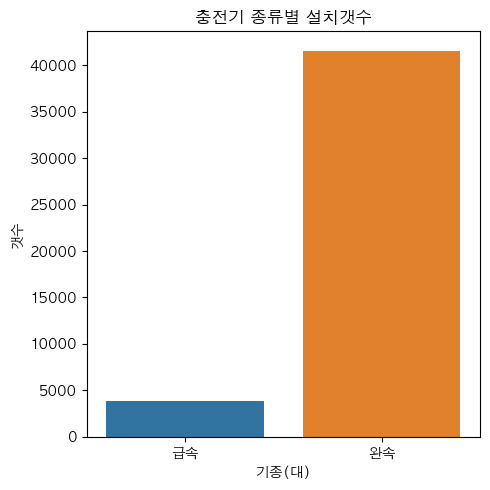

In [5]:
# 설치년도별 충전기 종류의 갯수 계산
charger_count = charger_df.groupby(['기종(대)']).size().reset_index(name='갯수')
charger_count['비율'] = (charger_count['갯수'] / charger_count['갯수'].sum() *100).round(2)
display(charger_count)

# 그래프 크기 설정
plt.figure(figsize=(5, 5))
sns.barplot(charger_count, x = '기종(대)', y = '갯수')
plt.title('충전기 종류별 설치갯수')
plt.xlabel('기종(대)')
plt.ylabel('갯수')
plt.tight_layout()
plt.show()

기종(대),급속,완속
설치년도,,
2012,5.0,4.0
2013,NaN,4.0
2015,7.0,4.0
2016,63.0,68.0
2017,342.0,1257.0
2018,212.0,1393.0
2019,208.0,1616.0
2020,270.0,2293.0
2021,419.0,7887.0


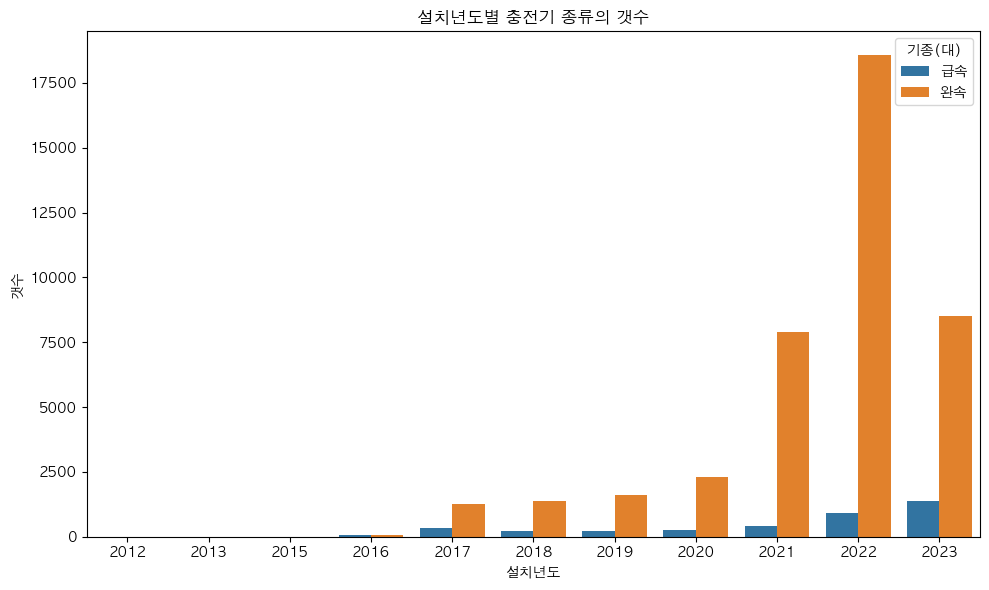

In [6]:
# 설치년도별 충전기 종류의 갯수 계산
charger_count_by_year = charger_df.groupby(['설치년도', '기종(대)']).size().reset_index(name='갯수')

# pivot을 사용하여 데이터프레임 재구성
charger_count_by_year_df = pd.pivot_table(charger_count_by_year, index='설치년도', columns='기종(대)', values='갯수')

display(charger_count_by_year_df)

import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))
sns.barplot(charger_count_by_year, x = '설치년도', y = '갯수', hue = '기종(대)')
plt.title('설치년도별 충전기 종류의 갯수')
plt.xlabel('설치년도')
plt.ylabel('갯수')
plt.tight_layout()
plt.show()

기종(대),급속,완속
군구,,
강남구,253,3354
강동구,127,1582
강북구,118,717
강서구,205,2395
관악구,174,789
광진구,78,754
구로구,115,2062
금천구,187,1227
노원구,141,1871


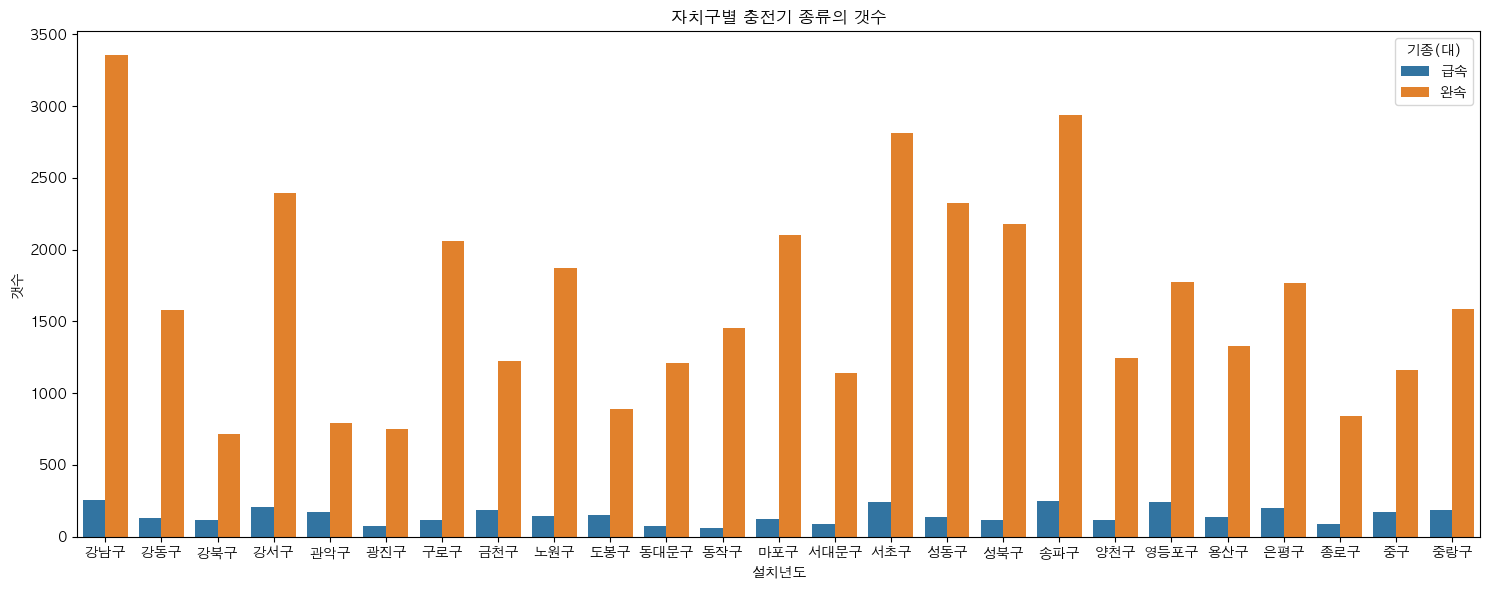

In [7]:
#자치구별 완속/급속기 갯수
charger_count_by_city = charger_df.groupby(['군구','기종(대)']).size().reset_index(name='갯수')

# pivot을 사용하여 데이터프레임 재구성
charger_count_by_city_df = pd.pivot_table(charger_count_by_city, index='군구', columns='기종(대)', values='갯수')

display(charger_count_by_city_df)

# 그래프 크기 설정
plt.figure(figsize=(15, 6))
sns.barplot(charger_count_by_city, x = '군구', y = '갯수', hue = '기종(대)')
plt.title('자치구별 충전기 종류의 갯수')
plt.xlabel('설치년도')
plt.ylabel('갯수')
plt.tight_layout()
plt.show()

,시설구분(대),시설구분(소),기종(대),갯수
0,공공시설,공공기관,급속,169
1,공공시설,공공기관,완속,484
2,공공시설,관공서,급속,67
3,공공시설,관공서,완속,159
4,공공시설,주민센터,급속,55
...,...,...,...,...
88,차량정비시설,서비스센터,완속,4
89,차량정비시설,정비소,급속,30
90,차량정비시설,정비소,완속,18
91,휴게시설,고속도로 휴게소,급속,5


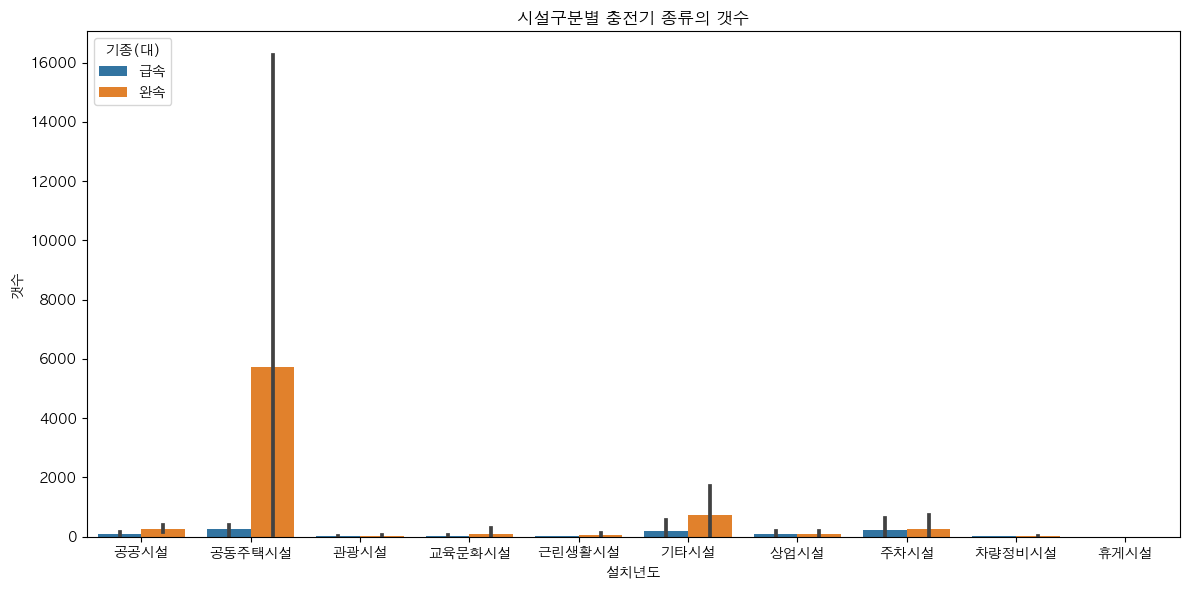

In [8]:
#자치구별 완속/급속기 갯수
charger_count_by_building_df = charger_df.groupby(['시설구분(대)','시설구분(소)','기종(대)']).size().reset_index(name='갯수')

display(charger_count_by_building_df)

# 그래프 크기 설정
plt.figure(figsize=(12, 6))
sns.barplot(charger_count_by_building_df, x = '시설구분(대)', y = '갯수', hue = '기종(대)')
plt.title('시설구분별 충전기 종류의 갯수')
plt.xlabel('설치년도')
plt.ylabel('갯수')
plt.tight_layout()
plt.show()

### 서울시 교통량 이력 정보(사용X)
- https://data.seoul.go.kr/dataList/OA-13316/A/1/datasetView.do
- 지정하는 날짜와 시간에 대해서만 조회할 수 있음(사용X)

In [9]:
# import requests
# import pandas as pd 


# serviceKey = "64706171756b736b3530424a445873"  # 일반 인증키 (Decoding)

# url = 'http://openapi.seoul.go.kr:8088/64706171756b736b3530424a445873/xml/VolInfo/1/5/A-05/20240301/20/'


# params ={'KEY' : serviceKey, 'TYPE' : 'xml', 'SERVICE' : 'VolInfo', 'START_INDEX' : '1', 'END_INDEX' : '1000'}
# #numOfRows가 23000는 불러와지지 않아서 20000개까지만 호출

# response = requests.get(url, params=params)

# #print(response.content)  # bytes 형태여서 보기 힘듦.
# content = response.content.decode('utf-8')  # utf-8로 디코딩함. 
# print(content)

# traffic_df = pd.read_xml(response.content)  

### 서울시 교통량
- https://topis.seoul.go.kr/refRoom/openRefRoom_2.do
- '지점코드별', '월별', '유입' 교통량 합계
- '서울시 교통량 지점정보'의 지점코드로 위치(경도, 위도) 표시

In [10]:
#월별 데이터 불러오기
df_202402 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/02월 서울시 교통량 조사자료(2024).xlsx', sheet_name='2024년 02월')
df_202401 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/01월 서울시 교통량 조사자료(2024).xlsx', sheet_name='2024년 01월')
df_202312 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/12월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 12월')
df_202311 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/11월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 11월')
df_202310 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/10월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 10월')
df_202309 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/09월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 09월')
df_202308 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/08월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 08월')
df_202307 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/07월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 07월')
df_202306 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/06월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 06월')
df_202305 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/05월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 05월')
df_202304 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/04월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 04월')
df_202303 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/03월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 03월')
df_202302 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/02월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 02월')
df_202301 = pd.read_excel('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/01월 서울시 교통량 조사자료(2023).xlsx', sheet_name='2023년 01월')

In [11]:
# '지점별', '유입' 기준의 교통량 합계 데이터프레임 함수
def get_traffic(df) : 
    df = df[df.loc[:,'방향'] == '유입']
    df['합계'] = df.loc[:,'0시':'23시'].sum(axis=1)
    df = pd.DataFrame(df.groupby(['지점명','지점번호']).agg({'합계' : 'sum'}))
    return df 

In [12]:
# 월별 교통량 합계 데이터프레임 병합
# 월별 날짜로 컬럼명 수정
month_traffic = get_traffic(df_202402).rename(columns={'합계' : '2024-02'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202401), on = ['지점명', '지점번호']).rename(columns={'합계' : '2024-01'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202312), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-12'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202311), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-11'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202310), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-10'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202309), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-09'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202308), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-08'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202307), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-07'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202306), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-06'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202305), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-05'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202304), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-04'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202303), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-03'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202302), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-02'})
month_traffic = pd.merge(month_traffic, get_traffic(df_202301), on = ['지점명', '지점번호']).rename(columns={'합계' : '2023-01'})
month_traffic

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/812359547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합계'] = df.loc[:,'0시':'23시'].sum(axis=1)
/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/812359547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합계'] = df.loc[:,'0시':'23시'].sum(axis=1)
/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_8542/812359547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,,2024-02,2024-01,2023-12,2023-11,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01
지점명,지점번호,,,,,,,,,,,,,,
가양대교,C-03,1555465.0,1668646.0,1715164.0,1744913.0,1716376.0,1498958.0,1501420.0,1732890.0,1732920.0,1681605.0,1746870.0,1826804.0,1611171.0,1641095.0
강남대로(강남역-신분당),D-35,624039.0,772619.0,766336.0,776765.0,749099.0,747214.0,772550.0,763077.0,742412.0,753886.0,739451.0,782502.0,711953.0,724579.0
강남대로(신사역),D-43,984935.0,1072936.0,1060556.0,1073123.0,1109828.0,1054499.0,1115710.0,1122308.0,1103407.0,1130594.0,1101811.0,1141937.0,1007466.0,1057444.0
강남순환로,F-08,1178776.0,1232268.0,1265423.0,1293099.0,1329495.0,1321550.0,1327055.0,1303514.0,1312291.0,1338748.0,1370241.0,1453092.0,1317098.0,1383981.0
강변북로,F-02,3009714.0,3240421.0,3226595.0,3263492.0,3328317.0,2469194.0,3276688.0,2023026.0,3334731.0,3267106.0,3068425.0,3375685.0,3046088.0,2687067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
헌릉로(세곡동사거리),D-40,911893.0,953635.0,908690.0,1022394.0,237579.0,0.0,294836.0,989663.0,975623.0,993857.0,990655.0,1031944.0,861391.0,938624.0
화곡로(화곡로입구),B-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214652.0,0.0,429998.0,604274.0,627913.0,563280.0,587744.0
화랑로(상월곡역),D-08,0.0,0.0,0.0,359395.0,1072083.0,1031314.0,1079061.0,1102170.0,1077217.0,1095293.0,1077119.0,1120551.0,996265.0,1057383.0


### 서울시 교통량 지점 정보
- https://data.seoul.go.kr/dataList/OA-13314/A/1/datasetView.do
- 각 교통지점에 대한 위치정보 확인

In [13]:
import requests
import pandas as pd 

serviceKey = "64706171756b736b3530424a445873"  # 일반 인증키 (Decoding)

url = 'http://openapi.seoul.go.kr:8088/64706171756b736b3530424a445873/xml/SpotInfo/1/1000/'

params ={'KEY' : serviceKey, 'TYPE' : 'xml', 'SERVICE' : 'SpotInfo', 'START_INDEX' : '1', 'END_INDEX' : '10000'}
#numOfRows가 23000는 불러와지지 않아서 20000개까지만 호출

response = requests.get(url, params=params)

#print(response.content)  # bytes 형태여서 보기 힘듦.
content = response.content.decode('utf-8')  # utf-8로 디코딩함. 
print(content)

traffic_point_df = pd.read_xml(response.content)  
traffic_point_df.head(3) 

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><SpotInfo><list_total_count>139</list_total_count><RESULT><CODE>INFO-000</CODE><MESSAGE>정상 처리되었습니다</MESSAGE></RESULT><row><spot_num>A-01</spot_num><spot_nm>성산로(금화터널)</spot_nm><grs80tm_x>195489</grs80tm_x><grs80tm_y>452136</grs80tm_y></row><row><spot_num>A-02</spot_num><spot_nm>사직로(사직터널)</spot_nm><grs80tm_x>196756.776106</grs80tm_x><grs80tm_y>452546.638644</grs80tm_y></row><row><spot_num>A-03</spot_num><spot_nm>자하문로(자하문터널)</spot_nm><grs80tm_x>197216.855046</grs80tm_x><grs80tm_y>454350.990432</grs80tm_y></row><row><spot_num>A-04</spot_num><spot_nm>대사관로(삼청터널)</spot_nm><grs80tm_x>198648.893154</grs80tm_x><grs80tm_y>455200.108465</grs80tm_y></row><row><spot_num>A-05</spot_num><spot_nm>율곡로(안국역)</spot_nm><grs80tm_x>198645.671347</grs80tm_x><grs80tm_y>452937.216603</grs80tm_y></row><row><spot_num>A-06</spot_num><spot_nm>창경궁로(서울여자대학교)</spot_nm><grs80tm_x>199825.89671</grs80tm_x><grs80tm_y>453668.322568</grs80tm_y></row><row><spot_num>A-07</

,list_total_count,CODE,MESSAGE,spot_num,spot_nm,grs80tm_x,grs80tm_y
0,139.0,None,None,None,None,NaN,NaN
1,NaN,INFO-000,정상 처리되었습니다,None,None,NaN,NaN
2,NaN,None,None,A-01,성산로(금화터널),195489.0,452136.0


In [14]:
# month_traffic_df의 지점번호(spot_num) 컬럼명 변경
traffic_point_df = traffic_point_df.rename(columns = {'spot_num' : '지점번호'})

# 지점번호 기준으로 병합 (지점병 위치정보))
# 필요없는 컬럼 삭제
month_traffic_df = pd.merge(month_traffic, traffic_point_df, on = '지점번호').drop(columns = ['list_total_count', 'CODE', 'MESSAGE', 'spot_nm'])
month_traffic_df.head(3) 

,지점번호,2024-02,2024-01,2023-12,2023-11,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,grs80tm_x,grs80tm_y
0,C-03,1555465.0,1668646.0,1715164.0,1744913.0,1716376.0,1498958.0,1501420.0,1732890.0,1732920.0,1681605.0,1746870.0,1826804.0,1611171.0,1641095.0,187636.0,452084.0
1,D-35,624039.0,772619.0,766336.0,776765.0,749099.0,747214.0,772550.0,763077.0,742412.0,753886.0,739451.0,782502.0,711953.0,724579.0,202677.0,443638.0
2,D-43,984935.0,1072936.0,1060556.0,1073123.0,1109828.0,1054499.0,1115710.0,1122308.0,1103407.0,1130594.0,1101811.0,1141937.0,1007466.0,1057444.0,201776.0,446166.0


### 서울 생활인구
- '행정동별' 총생활인구의 '2024/02/01 ~ 2024/03/27'
- 자치구 단위 데이터 : https://data.seoul.go.kr/dataList/OA-15379/S/1/datasetView.do
- 행정동 단위 데이터(내국인) : https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#

In [156]:
#2023.01~2024.02 파일 불러오기
people_202301_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202301.csv')
people_202302_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202302.csv')
people_202303_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202303.csv')
people_202304_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202304.csv')
people_202305_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202305.csv')
people_202306_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202306.csv')
people_202307_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202307.csv')
people_202308_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202308.csv')
people_202309_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202309.csv')
people_202310_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202310.csv')
people_202311_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202311.csv')
people_202312_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202312.csv')
people_202401_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202401.csv')
people_202402_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202402.csv')

#데이터프레임 확인
display(people_202301_df.head(3))

#컬럼이 한칸씩 밀린 상태라서 조정해줌
def re_column(df) : 
    df = df.shift(1, axis = 1).drop(columns='기준일ID').reset_index().rename(columns={'index' : '기준일ID'})
    df['기준일ID'] = df['기준일ID'].astype(str)
    df['기준일ID'] = pd.to_datetime(df['기준일ID'])
    return df 

people_202301_df = re_column(people_202301_df)
people_202302_df = re_column(people_202302_df)
people_202303_df = re_column(people_202303_df)
people_202304_df = re_column(people_202304_df)
people_202305_df = re_column(people_202305_df)
people_202306_df = re_column(people_202306_df)
people_202307_df = re_column(people_202307_df)
people_202308_df = re_column(people_202308_df)
people_202309_df = re_column(people_202309_df)
people_202310_df = re_column(people_202310_df)
people_202311_df = re_column(people_202311_df)
people_202312_df = re_column(people_202312_df)
people_202401_df = re_column(people_202401_df)
people_202402_df = re_column(people_202402_df)


#데이터프레임 확인
print('컬럼조정 후')
display(people_202301_df.head(3))

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
20230101,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,1017.8879,...,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398,NaN
20230101,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,2452.3951,...,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468,NaN
20230101,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,859.3891,...,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534,NaN


컬럼조정 후


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,1427.6022,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398
1,2023-01-01,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,...,1358.7566,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468
2,2023-01-01,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,...,742.9488,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534


In [157]:
# 2024년 03은 파일이 달라서 별도로 불러오기
people_202403_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/(2~3월)행정동 단위 서울 생활인구(내국인).csv', encoding = 'cp949', parse_dates=['기준일ID'])
people_202403_df = people_202403_df[people_202403_df['기준일ID'].dt.month == 3]
people_202403_df

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2024-03-27,0,11110515,14840.8831,549.1561,349.9232,530.2756,327.0264,422.4447,367.4800,...,466.9370,550.3783,615.8600,698.8575,813.4778,647.1391,617.5994,524.3623,317.6291,1092.1060
1,2024-03-27,0,11110530,12511.9138,230.5748,102.4779,206.5595,298.3025,430.3030,486.6721,...,426.8558,510.9462,712.4392,551.5134,732.0788,573.7340,478.8029,433.9911,314.8969,848.9820
2,2024-03-27,0,11110540,3757.1119,51.2484,39.2684,317.8925,335.1009,96.4261,125.2983,...,91.0278,108.1918,128.1927,164.9726,192.9392,123.3782,127.3750,117.8764,90.7879,277.2628
3,2024-03-27,0,11110550,13277.8393,482.4300,374.0694,411.5055,387.3475,372.3330,320.8175,...,376.2456,364.9760,418.8113,616.4249,682.9057,525.7875,601.0440,487.1627,386.2496,1024.5674
4,2024-03-27,0,11110560,18971.1880,562.6977,407.0175,573.4781,625.6243,438.1576,360.6944,...,447.4357,437.1093,689.5887,747.0604,872.8771,836.5817,1064.8826,877.3279,618.2414,1703.5811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274747,2024-03-01,23,11740650,25945.9379,1040.6991,361.0055,527.8649,690.9289,1061.8510,1138.3612,...,1213.6757,1069.8874,1084.9105,844.9799,953.0561,931.8670,1042.3077,978.6069,738.9233,2001.0592
274748,2024-03-01,23,11740660,27225.7747,705.9176,424.3263,750.0790,886.0235,928.0713,1026.6320,...,1088.1367,986.4172,1163.8307,1100.4022,1226.2757,999.3871,1186.2611,1121.2008,773.7297,2041.2803
274749,2024-03-01,23,11740685,58116.3300,1730.7294,836.9223,1160.9990,1494.0596,2185.8619,2219.3435,...,2574.4919,2195.9365,2461.5768,2112.0891,2318.6499,2331.2878,2523.9731,2201.0254,1777.3835,4583.2488
274750,2024-03-01,23,11740690,4524.7582,206.5985,156.5802,255.8142,128.0482,101.1797,103.2570,...,99.2353,122.3280,150.7879,197.8638,219.5284,172.6246,195.2109,165.5176,120.6158,364.0996


In [158]:
#월별 데이터 프레임 합치기
people_df = pd.concat([people_202301_df, people_202302_df, people_202303_df, people_202304_df,
                       people_202305_df, people_202306_df, people_202307_df,
                        people_202308_df, people_202309_df, people_202310_df, people_202311_df, people_202312_df,
                        people_202401_df, people_202402_df, people_202403_df],axis = 0).reset_index().drop(columns = 'index')

people_df.head(3)

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,1427.6022,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398
1,2023-01-01,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,...,1358.7566,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468
2,2023-01-01,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,...,742.9488,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534


In [159]:
#행정동 코드로 행정동 이름 추가
#!pip install PublicDataReader
import PublicDataReader as pdr #행정동 코드 조회
hdong_df = pdr.code_hdong()

#시도코드 = 11(서울특별시)만 불러오기
hdong_df = hdong_df[hdong_df['시도코드'] == '11']
display(hdong_df.head(3))
print('hdong_df 행정동코드 변경전:', hdong_df['행정동코드'].dtypes) 

#행정동코드 타입변경, 앞 8자까지만 추출
hdong_df['행정동코드'] = hdong_df['행정동코드'].str[:8].astype('int')
display(hdong_df.head(3))
print('hdong_df 행정동코드 변경후:', hdong_df['행정동코드'].dtypes)

#행정동코드 기준으로 merge
people_df = pd.merge(people_df, hdong_df, on = '행정동코드')

#데이터프레임 확인
people_df.head(3)

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,19880423,
2,11,서울특별시,11110,종로구,1111051000,청운동,19880423,20081101


hdong_df 행정동코드 변경전: object


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,생성일자,말소일자
0,11,서울특별시,11000,,11000000,,19880423,
1,11,서울특별시,11110,종로구,11110000,,19880423,
2,11,서울특별시,11110,종로구,11110510,청운동,19880423,20081101


hdong_df 행정동코드 변경후: int64


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시도코드,시도명,시군구코드,시군구명,읍면동명,생성일자,말소일자
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,463.8273,502.3974,1147.4398,11,서울특별시,11620,관악구,신원동,20080901,
1,2023-01-01,1,11620655,19799.3460,244.6408,138.6100,446.4518,1045.7831,1833.8513,1264.0560,...,448.5198,514.7354,1145.1050,11,서울특별시,11620,관악구,신원동,20080901,
2,2023-01-01,2,11620655,20029.6992,200.6997,113.7135,427.7023,1042.3786,1820.6150,1307.7028,...,458.7113,515.5459,1136.2384,11,서울특별시,11620,관악구,신원동,20080901,


In [160]:
#people_df 성별 합치고 연령대 10세 단위로 묶기
population_df = people_df.copy()
population_df['0세 ~ 9세 생활인구'] = population_df['남자0세부터9세생활인구수'] + population_df['여자0세부터9세생활인구수'] 
population_df['10세 ~ 19세 생활인구'] = population_df['남자10세부터14세생활인구수'] + population_df['남자15세부터19세생활인구수'] + population_df['여자10세부터14세생활인구수'] + people_df['여자15세부터19세생활인구수'] 
population_df['20세 ~ 29세 생활인구'] = population_df['남자20세부터24세생활인구수'] + population_df['남자25세부터29세생활인구수'] + population_df['여자20세부터24세생활인구수'] + people_df['여자25세부터29세생활인구수'] 
population_df['30세 ~ 39세 생활인구'] = population_df['남자30세부터34세생활인구수'] + population_df['남자35세부터39세생활인구수'] + population_df['여자30세부터34세생활인구수'] + people_df['여자35세부터39세생활인구수'] 
population_df['40세 ~ 49세 생활인구'] = population_df['남자40세부터44세생활인구수'] + population_df['남자45세부터49세생활인구수'] + population_df['여자40세부터44세생활인구수'] + people_df['여자45세부터49세생활인구수'] 
population_df['50세 ~ 59세 생활인구'] = population_df['남자50세부터54세생활인구수'] + population_df['남자55세부터59세생활인구수'] + population_df['여자50세부터54세생활인구수'] + people_df['여자55세부터59세생활인구수'] 
population_df['60세 ~ 69세 생활인구'] = population_df['남자60세부터64세생활인구수'] + population_df['남자65세부터69세생활인구수'] + population_df['여자60세부터64세생활인구수'] + people_df['여자65세부터69세생활인구수'] 
population_df['70세 이상'] = population_df['남자70세이상생활인구수'] + population_df['여자70세이상생활인구수']

#필요없는 컬럼 삭제
population_df = population_df.drop(columns = ['남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수'])

#필요없는 컬럼 삭제
population_df = population_df.drop(columns = ['시도코드', '시도명', '시군구코드','생성일자', '말소일자'])
population_df

,기준일ID,시간대구분,행정동코드,총생활인구수,시군구명,읍면동명,0세 ~ 9세 생활인구,10세 ~ 19세 생활인구,20세 ~ 29세 생활인구,30세 ~ 39세 생활인구,40세 ~ 49세 생활인구,50세 ~ 59세 생활인구,60세 ~ 69세 생활인구,70세 이상
0,2023-01-01,0,11620655,20101.7019,관악구,신원동,521.4344,1205.2121,5657.6198,3992.6318,2724.5890,2354.1637,1709.8723,1936.1794
1,2023-01-01,1,11620655,19799.3460,관악구,신원동,533.5086,1097.6007,5591.9885,3978.0846,2633.9027,2347.3771,1687.2580,1929.6252
2,2023-01-01,2,11620655,20029.6992,관악구,신원동,477.8625,1079.8234,5630.9879,4097.1579,2729.0566,2378.0691,1690.8773,1945.8634
3,2023-01-01,3,11620655,20146.1167,관악구,신원동,497.2712,1034.1555,5654.9866,4079.9103,2774.5060,2422.1551,1735.5910,1947.5428
4,2023-01-01,4,11620655,19664.2633,관악구,신원동,470.4065,971.5378,5357.7572,4002.7992,2762.4468,2379.3812,1739.5421,1980.3904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599547,2024-03-01,19,11500510,26916.8782,강서구,염창동,2324.7722,2489.7663,3066.9686,5375.4682,5088.4707,3701.3386,2630.5415,2239.5514
4599548,2024-03-01,20,11500510,28474.1789,강서구,염창동,2555.6118,2752.1309,3171.3740,5729.0030,5373.4684,3859.2018,2736.2783,2297.1104
4599549,2024-03-01,21,11500510,29887.8738,강서구,염창동,2589.0541,2873.7491,3378.7201,6059.8863,5740.2025,3993.7324,2851.0133,2401.5174
4599550,2024-03-01,22,11500510,30674.7599,강서구,염창동,2670.4225,2957.5531,3568.5584,6312.1329,6040.5362,3910.9730,2812.2016,2402.3836


In [161]:
#기준일ID에서 년월 추출
population_df['기준년월'] = population_df['기준일ID'].dt.strftime('%Y-%m')

#데이터 확인
population_df.head(3)

,기준일ID,시간대구분,행정동코드,총생활인구수,시군구명,읍면동명,0세 ~ 9세 생활인구,10세 ~ 19세 생활인구,20세 ~ 29세 생활인구,30세 ~ 39세 생활인구,40세 ~ 49세 생활인구,50세 ~ 59세 생활인구,60세 ~ 69세 생활인구,70세 이상,기준년월
0,2023-01-01,0,11620655,20101.7019,관악구,신원동,521.4344,1205.2121,5657.6198,3992.6318,2724.5890,2354.1637,1709.8723,1936.1794,2023-01
1,2023-01-01,1,11620655,19799.3460,관악구,신원동,533.5086,1097.6007,5591.9885,3978.0846,2633.9027,2347.3771,1687.2580,1929.6252,2023-01
2,2023-01-01,2,11620655,20029.6992,관악구,신원동,477.8625,1079.8234,5630.9879,4097.1579,2729.0566,2378.0691,1690.8773,1945.8634,2023-01


In [162]:
population_df.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '시군구명', '읍면동명', '0세 ~ 9세 생활인구',
       '10세 ~ 19세 생활인구', '20세 ~ 29세 생활인구', '30세 ~ 39세 생활인구', '40세 ~ 49세 생활인구',
       '50세 ~ 59세 생활인구', '60세 ~ 69세 생활인구', '70세 이상', '기준년월'],
      dtype='object')

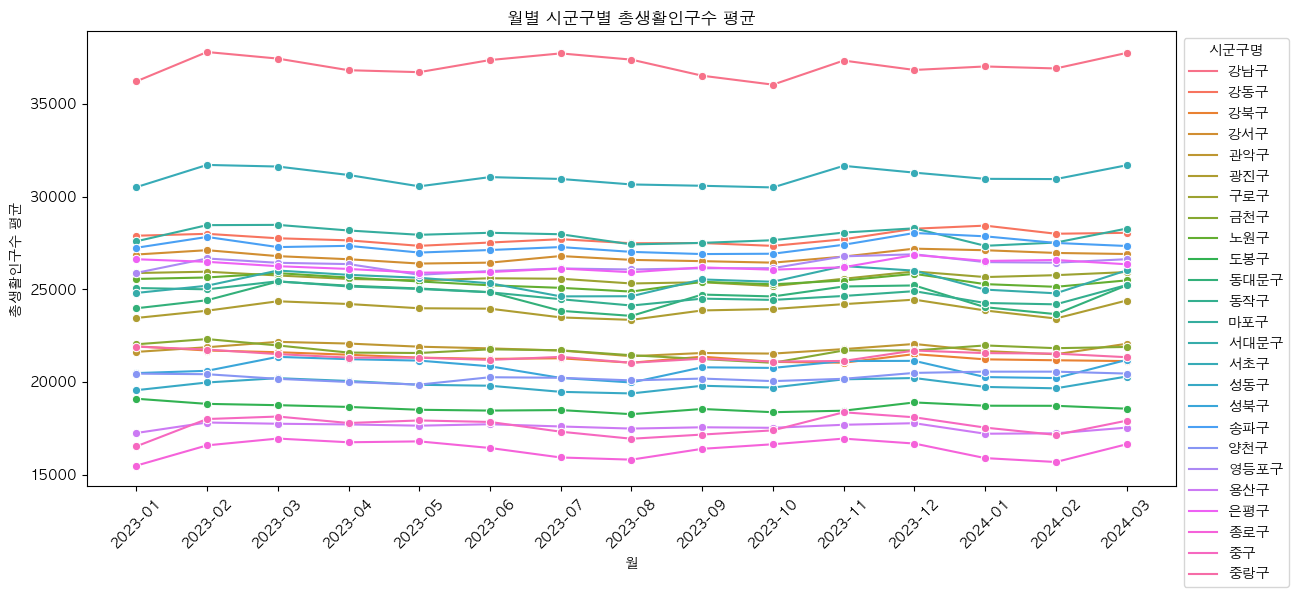

In [187]:
monthly_avg_popluation = pd.DataFrame(population_df.groupby(['기준년월', '시군구명'])['총생활인구수'].mean())
# 그래프 그리기
plt.figure(figsize=(13, 6))
sns.lineplot(data=monthly_avg_popluation, x='기준년월', y='총생활인구수', hue='시군구명', marker='o')
plt.title('월별 시군구별 총생활인구수 평균')
plt.xlabel('월')
plt.ylabel('총생활인구수 평균')
plt.xticks(rotation=45)
plt.legend(title='시군구명', loc = 'upper right',  bbox_to_anchor=(1.11, 1))
plt.tight_layout()
plt.show()


총생활인구수 상위 10개구


,총생활인구수
시군구명,
강남구,37045.692803
서초구,31041.466495
마포구,27903.409236
강동구,27764.935375
송파구,27326.890718
강서구,26757.038956
영등포구,26305.786701
은평구,26262.177217
구로구,25624.787248


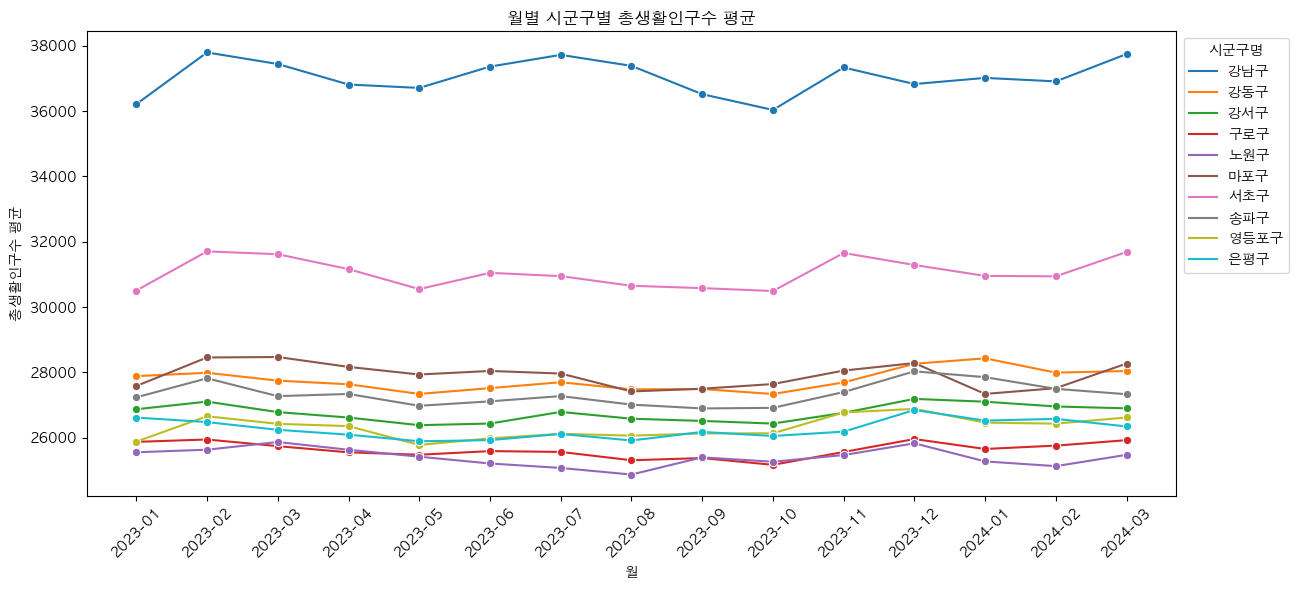

In [204]:
#상위 10개구만 확인
print('총생활인구수 상위 10개구')
top10_population = pd.DataFrame(population_df.groupby('시군구명')['총생활인구수'].mean().sort_values(ascending=False).head(10))
display(top10_population)

#상위 10개구 월별 평균 총생활인구수
top10_population_df = population_df[population_df['시군구명'].isin(top10_population.index)]
top10_monthly_avg_popluation = pd.DataFrame(top10_population_df.groupby(['기준년월', '시군구명'])['총생활인구수'].mean())

#상위10개구 생활인구수 추세 확인

plt.figure(figsize=(13, 6))
sns.lineplot(data=top10_monthly_avg_popluation, x='기준년월', y='총생활인구수', hue='시군구명', marker='o')
plt.title('월별 시군구별 총생활인구수 평균')
plt.xlabel('월')
plt.ylabel('총생활인구수 평균')
plt.xticks(rotation=45)
plt.legend(title='시군구명', loc = 'upper right',  bbox_to_anchor=(1.11, 1))
plt.tight_layout()
plt.show()


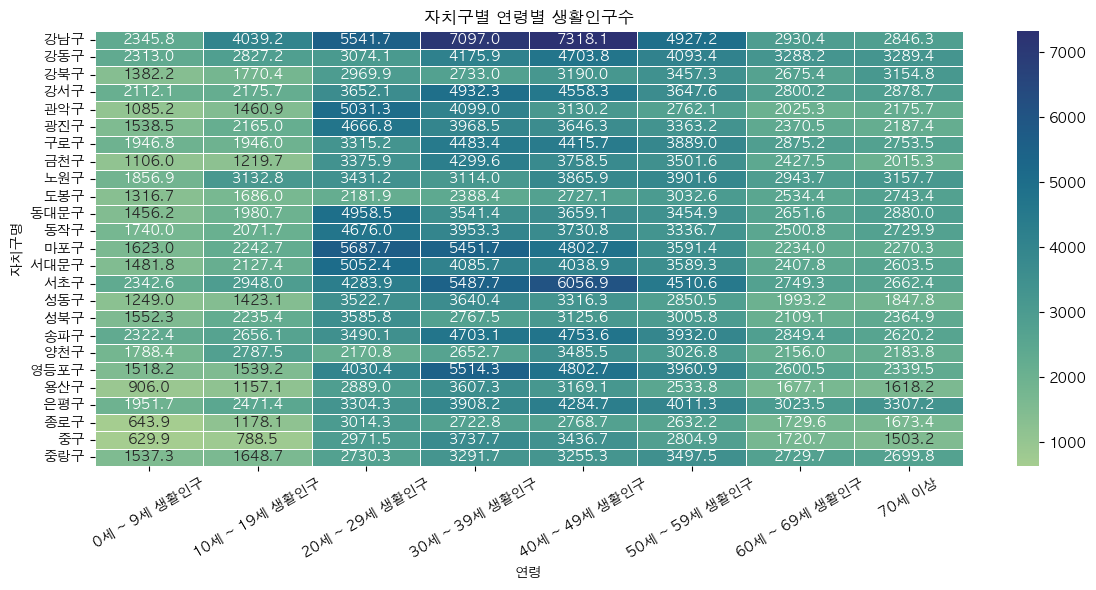

In [165]:
population_age_pivot = pd.pivot_table(population_df, index='시군구명', values=['0세 ~ 9세 생활인구', '10세 ~ 19세 생활인구',
                                                                    '20세 ~ 29세 생활인구', '30세 ~ 39세 생활인구',
                                                                    '40세 ~ 49세 생활인구', '50세 ~ 59세 생활인구',
                                                                    '60세 ~ 69세 생활인구', '70세 이상'],
                             aggfunc='mean')

plt.figure(figsize = (12, 6))
sns.heatmap(population_age_pivot, annot = True, fmt = ".1f", linewidth = 0.5, cmap = 'crest')
plt.xticks(rotation = 30)
plt.xlabel('연령')
plt.ylabel('자치구명')
plt.title('자치구별 연령별 생활인구수')
plt.tight_layout()
plt.show()

In [186]:
hdong_avg_popluation = pd.DataFrame(population_df.groupby(['시군구명', '읍면동명'])['총생활인구수'].mean())

#행정동별 평균 총생활인구수가 큰 순서대로 정렬
hdong_avg_popluation.sort_values(by = '총생활인구수', ascending = False).head(30)

#

,,총생활인구수
시군구명,읍면동명,
강남구,역삼1동,105623.959442
영등포구,여의동,97087.803757
마포구,서교동,74781.513974
서초구,서초3동,63744.714211
종로구,종로1.2.3.4가동,63223.438914
금천구,가산동,60428.038857
서대문구,신촌동,58093.434382
은평구,진관동,57599.771526
강동구,길동,56216.747622


## 서울시 동별 주차장
- https://data.seoul.go.kr/dataList/253/S/2/datasetView.do
- 행정동별 주차장 수(공영/민영/합계)
- 해당 데이터의 '읍면동명'중 '행정동코드'에 없는 데이터가 다수 있어 '행정동코드', '주소, 위도, 경도' 등을 사용하기 어려움

In [ ]:
#데이터 불러오기
seoul_parking_lot = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/주차장(동별)(2016년+이후)_20240401141024.csv')
seoul_parking_lot

,동별(1),동별(2),동별(3),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,동별(1),동별(2),동별(3),합계,합계,합계,합계,합계,합계
1,동별(1),동별(2),동별(3),소계,소계,공영,공영,민영,민영
2,동별(1),동별(2),동별(3),개소 (개소),면수 (면),개소 (개소),면수 (면),개소 (개소),면수 (면)
3,합계,소계,소계,305903,4548788,9193,178373,296710,4370415
4,합계,종로구,소계,8218,91438,187,6013,8031,85425
...,...,...,...,...,...,...,...,...,...
450,합계,강동구,천호2동,1689,16985,5,2552,1684,14433
451,합계,강동구,길동,1740,18399,1,825,1739,17574
452,합계,강동구,강일동,105,17156,3,220,102,16936
453,합계,강동구,상일1동,501,19555,1,258,500,19297


In [ ]:
#데이터프레임 정리(필요한 컬럼만 남기기, 컬럼이름 변경)
seoul_parking_lot_df = seoul_parking_lot.iloc[3:, 1:]
seoul_parking_lot_df.columns = ['자치구명', '읍면동명', '주차장개소합', '주차면수합', '공영개소합', '공영면수합', '민영개소합', '민영면수합']
seoul_parking_lot_df = seoul_parking_lot_df[seoul_parking_lot_df['읍면동명'] != '소계'].reset_index().drop(columns = 'index')
seoul_parking_lot_df

,자치구명,읍면동명,주차장개소합,주차면수합,공영개소합,공영면수합,민영개소합,민영면수합
0,종로구,사직동,362,12567,18,1445,344,11122
1,종로구,삼청동,345,2267,17,147,328,2120
2,종로구,부암동,596,3549,11,166,585,3383
3,종로구,평창동,1618,9369,23,281,1595,9088
4,종로구,무악동,70,3187,1,2,69,3185
...,...,...,...,...,...,...,...,...
421,강동구,천호2동,1689,16985,5,2552,1684,14433
422,강동구,길동,1740,18399,1,825,1739,17574
423,강동구,강일동,105,17156,3,220,102,16936
424,강동구,상일1동,501,19555,1,258,500,19297


---
# APPENDIX
- 충전소 운영현황 정보(api변경 사용X)
- https://safemap.go.kr/opna/data/dataView.do

In [ ]:
import requests
import pandas as pd 


serviceKey = "V9RHJ29A-V9RH-V9RH-V9RH-V9RHJ29AHU"  # 일반 인증키 (Decoding)

url = 'http://safemap.go.kr/openApiService/data/getChargingStationData.do'

params ={'serviceKey' : serviceKey, 'numOfRows' : '20000', 'pageNo' : '1', 'dataType' : 'XML', 'CTPRVN_CD' : '11' }
#numOfRows가 23000는 불러와지지 않아서 20000개까지만 호출

response = requests.get(url, params=params)

#print(response.content)  # bytes 형태여서 보기 힘듦.
content = response.content.decode('utf-8')  # utf-8로 디코딩함. 
print(content)

chager_place_df = pd.read_xml(response.content, xpath=".//item")  

<?xml version="1.0" encoding="UTF-8"?><response><header><resultCode>04</resultCode><resultMsg>해당 키로 신청된 서비스가 아닙니다. 신청 후 사용하여주세요.</resultMsg></header></response>


ValueError: xpath does not return any nodes. Be sure row level nodes are in xpath. If document uses namespaces denoted with xmlns, be sure to define namespaces and use them in xpath.

In [ ]:
#데이터 프레임 확인
display(chager_place_df.head(3)) 

#서울시 (CTPRVN_CD=11)만 호출되었는지 확인
print(chager_place_df['CTPRVN_CD'].unique())

#csv 파일로 저장
chager_place_df.to_csv('서울시 충전소 정보.csv', index = False)
